Uses the Interquartile Range (IQR = Q3 − Q1) to find bounds: points below Q1 − 1.5×IQR or above Q3 + 1.5×IQR are flagged as outliers.

Works well for skewed distributions because it depends on percentiles, not mean/standard deviation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Datasets/placement.csv')
df.shape

(1000, 3)

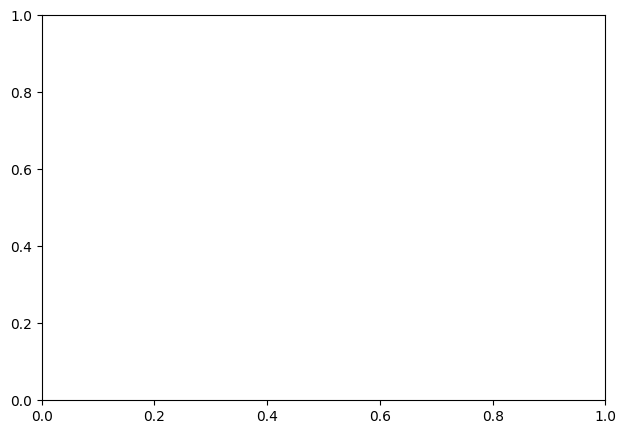

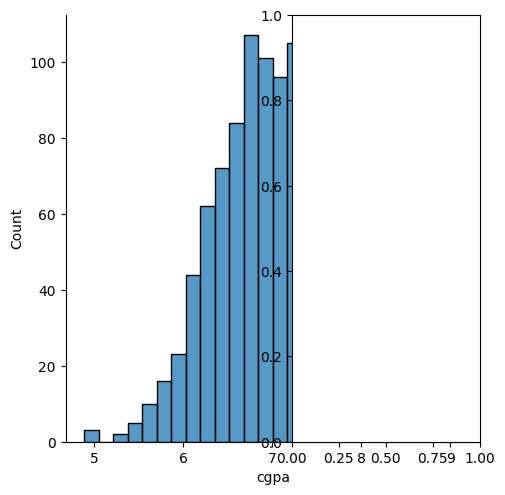

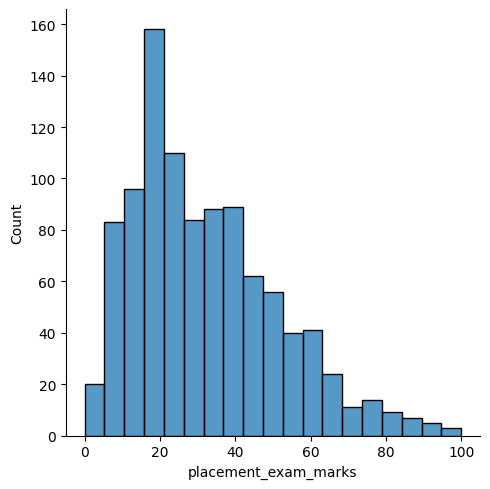

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.displot(df['cgpa'])

plt.subplot(1,2,2)
sns.displot(df['placement_exam_marks'])

plt.show()

In [4]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

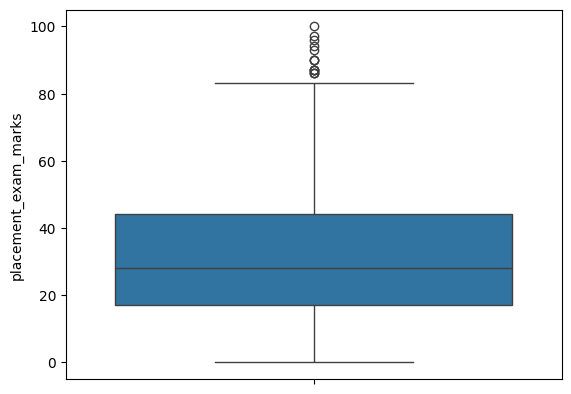

In [5]:
sns.boxplot(df['placement_exam_marks'])

In [6]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [7]:
percentile75

np.float64(44.0)

In [8]:
iqr = percentile75 - percentile25
iqr

np.float64(27.0)

In [9]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [10]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


#### Finding Outliers

In [11]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [12]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


Trimming: Completely removes outlier rows from the dataset based on chosen criteria (e.g., beyond Z-score or percentile thresholds). Good when you believe outliers are errors or irrelevant.

In [13]:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df.shape

(985, 3)

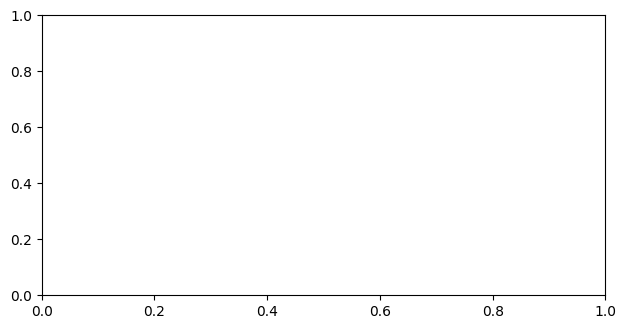

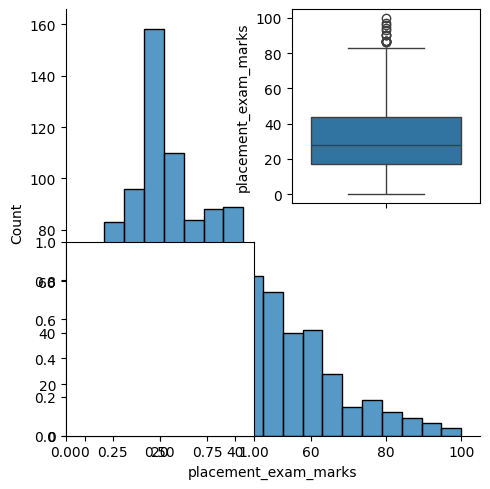

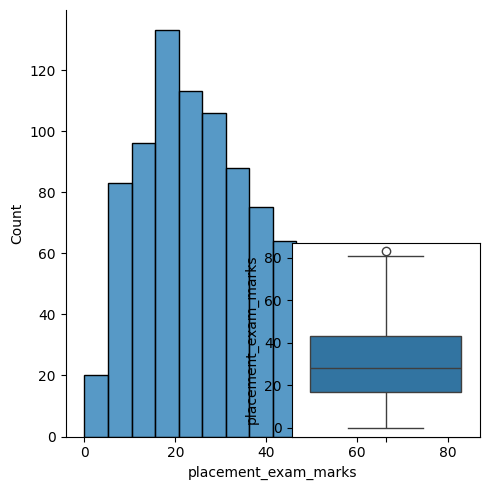

In [17]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.displot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.displot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

Capping (Winsorization): Replaces outliers with maximum/minimum threshold values (e.g., top 5% capped to 95th percentile). Keeps all rows but limits their impact on learning.

In [18]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [19]:
new_df_cap.shape

(1000, 3)

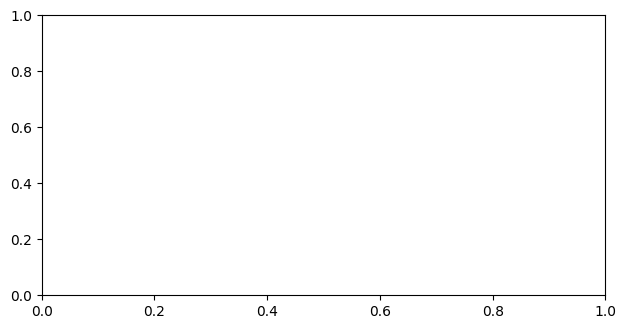

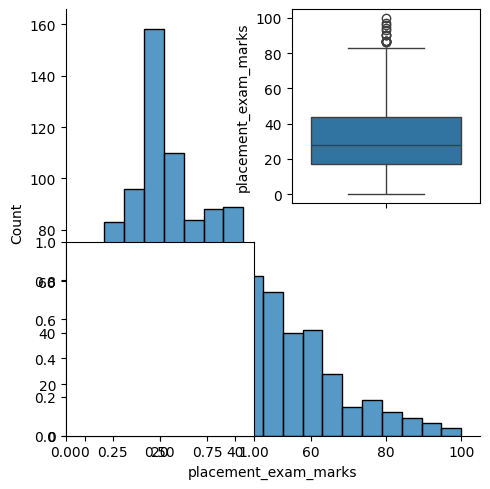

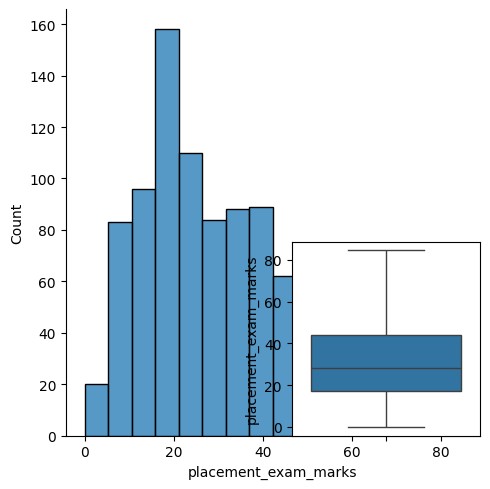

In [20]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.displot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.displot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()